In [1]:
def get_true_daily_deaths():
    
    # Step 1: Read the CSV file into a DataFrame
    true_deaths_df = pd.read_csv('data\\time_series_covid19_deaths_US.csv')

    # Step 2: Drop unnecessary columns
    columns_to_drop = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 
                    'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population']
    true_deaths_df.drop(columns=columns_to_drop, inplace=True) 
    

    # Step 3: Sum death counts across all states for each date
    true_deaths_df = true_deaths_df.transpose()  # Transpose DataFrame 
    true_deaths_df['total_deaths'] = true_deaths_df.sum(axis=1)  
    
    # Step 4: Drop not necessaary columns  
    true_deaths_df = true_deaths_df.iloc[:, [-1]] 

    # Step 5: Filter data to include only dates starting from 2020-02-05 and ending at 2020-12-31   
    true_deaths_df.index = pd.to_datetime(true_deaths_df.index, format='%m/%d/%y')
    true_deaths_df = true_deaths_df.loc['2020-02-04':'2021-12-31']
    # print(true_deaths_df.head())
    daily_deaths = true_deaths_df['total_deaths'].diff()  # get daily deaths from accum deaths 

    return daily_deaths 

import numpy as np 
def custom_loss(truth, preds):
    truth_logs = np.array(truth) 
    preds_logs = np.array(preds)
    numerator = np.sum(np.square(truth_logs - preds_logs))  
    loss = np.sum(np.sqrt(numerator / len(truth)))  
    return loss 
 

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotli

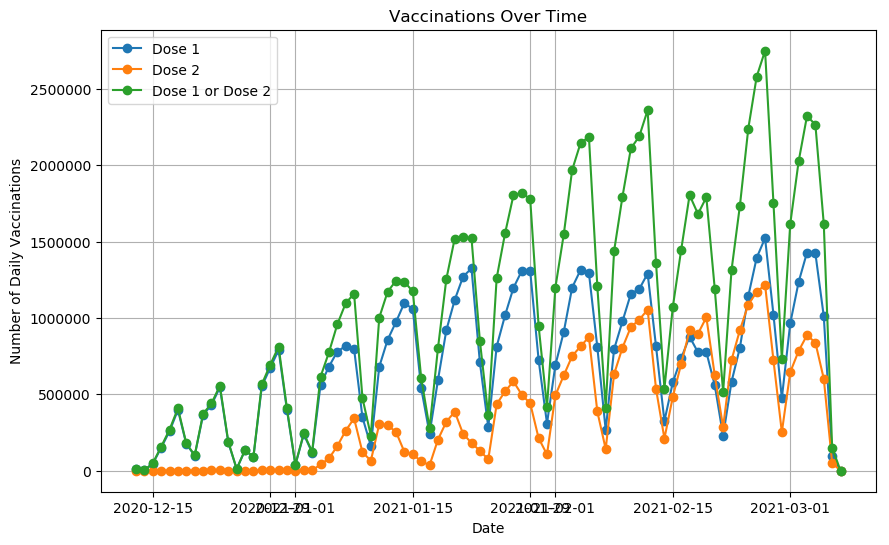

In [29]:
# visualization vaccinations 
import pandas as pd 
import matplotlib.pyplot as plt

csv_file = 'data\\cdc_vaccination_trends_data.csv' 
vaccination_data = pd.read_csv(csv_file)

# Ensure the date column is in datetime format 
vaccination_data['Date'] = pd.to_datetime(vaccination_data['Date']).dt.date 
# Filter the vaccination data within the date range 
# print(type(vaccination_data['Date'][0]), type(self.first_date))
# exit() 
# Select 'Administered_Daily' column and convert it to an array
dates = pd.to_datetime(vaccination_data['Date'])  # Convert dates to datetime format
daily_vaccinations_dose_1 = vaccination_data['Admin_Dose_1_Daily'].values 
daily_vaccinations_dose_2 = vaccination_data['Admin_Dose_2_Daily'].values 
Administered_Daily = vaccination_data['Administered_Daily'].values  
plt.figure(figsize=(10, 6))
plt.plot(dates, daily_vaccinations_dose_1, marker='o', linestyle='-', label = "Dose 1")
plt.plot(dates, daily_vaccinations_dose_2, marker='o', linestyle='-', label = "Dose 2")
plt.plot(dates, Administered_Daily, marker='o', linestyle='-', label = "Dose 1 or Dose 2")
plt.title('Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Daily Vaccinations')
plt.grid(True)
plt.legend()
plt.savefig("results//vaccination_data.png")
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


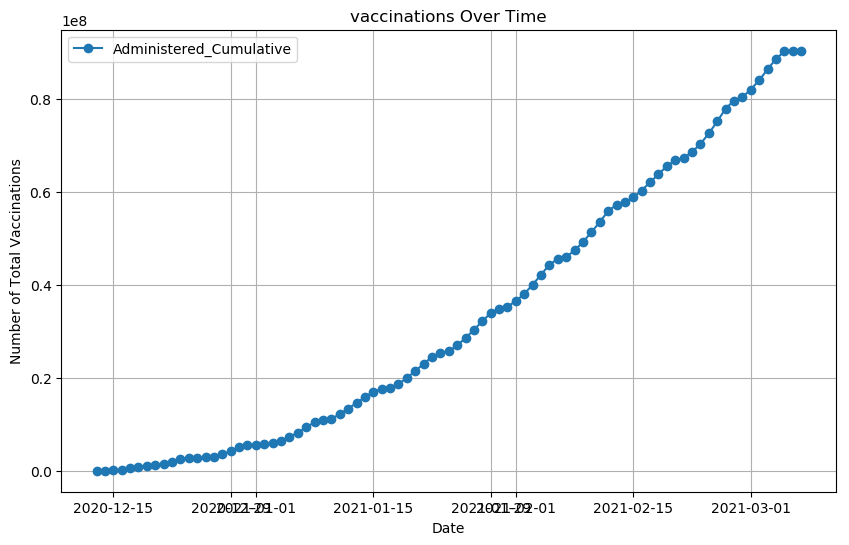

In [120]:
# visualization total vaccinations 
import pandas as pd 
import matplotlib.pyplot as plt

csv_file = 'data\\cdc_vaccination_trends_data.csv' 
vaccination_data = pd.read_csv(csv_file) 

prediction_file = 'data\\full_vaccinations_data.csv'
prediction_data = pd.read_csv(prediction_file)

# Ensure the date column is in datetime format 
vaccination_data['Date'] = pd.to_datetime(vaccination_data['Date']).dt.date 
# Filter the vaccination data within the date range 
# print(type(vaccination_data['Date'][0]), type(self.first_date))
# exit() 
# Select 'Administered_Daily' column and convert it to an array
dates = pd.to_datetime(vaccination_data['Date'])  # Convert dates to datetime format 
Administered_Daily = vaccination_data['Administered_Cumulative'].values  
plt.figure(figsize=(10, 6)) 
plt.plot(dates, Administered_Daily, marker='o', linestyle='-', label = "Administered_Cumulative") 
plt.title('vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Total Vaccinations')
plt.grid(True)
plt.legend()
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexes\range.py:839: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


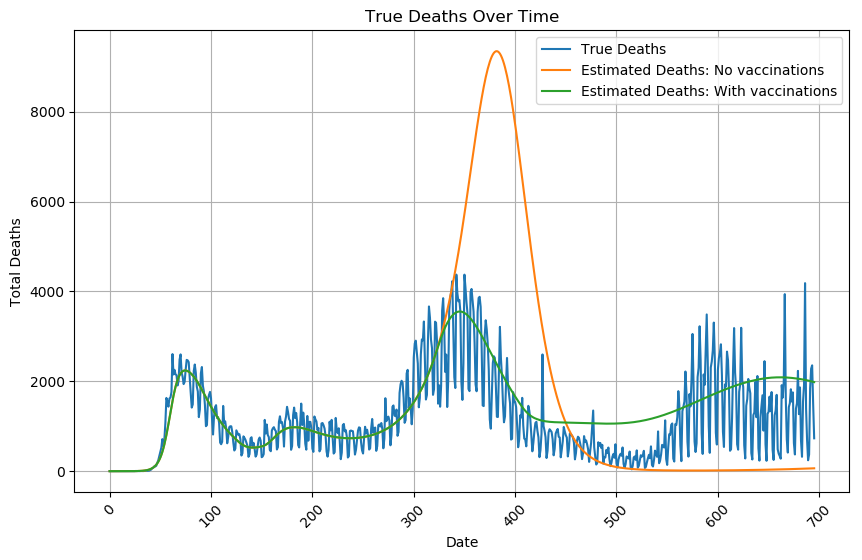

In [21]:
## plot the true deaths 
import pandas as pd 
import matplotlib.pyplot as plt

# read true daily deaths
true_deaths = get_true_daily_deaths() 
# read simulated data  
df1 = pd.read_csv('results\\no_vaccinations.csv')
df2 = pd.read_csv('results\\with_vaccinations.csv')   
dates = df1.index 
# Step 6: Plot the aggregated death data
plt.figure(figsize=(10, 6))
plt.plot(dates, true_deaths[1:], label='True Deaths')
plt.plot(dates, df1['deaths'], label='Estimated Deaths: No vaccinations')
plt.plot(dates, df2['deaths'], label='Estimated Deaths: With vaccinations')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('True Deaths Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
plt.show()

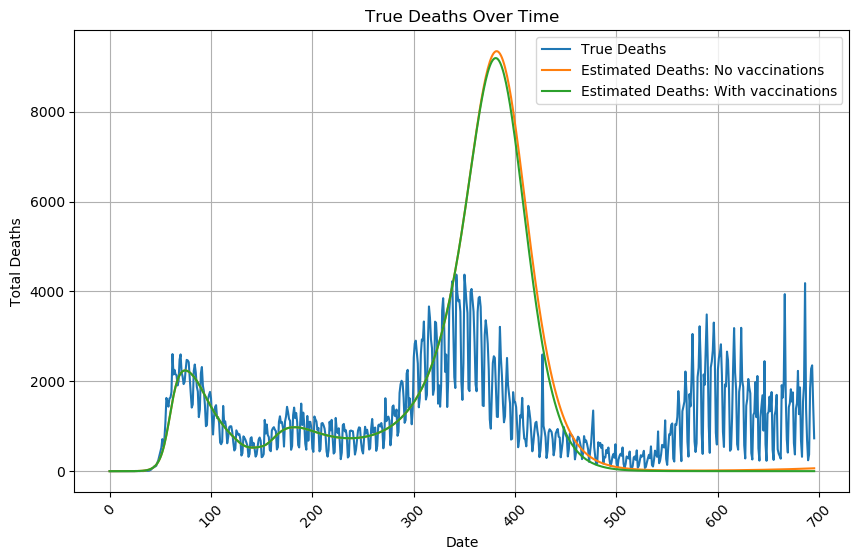

In [55]:
## plot the true deaths 
import pandas as pd 
import matplotlib.pyplot as plt

# read true daily deaths
true_deaths = get_true_daily_deaths() 
# read simulated data  
df1 = pd.read_csv('results\\no_vaccinations.csv')
df2 = pd.read_csv('results\\with_vaccinations.csv')   
dates = df1.index 
# Step 6: Plot the aggregated death data
plt.figure(figsize=(10, 6))
plt.plot(dates, true_deaths[1:], label='True Deaths')
plt.plot(dates, df1['deaths'], label='Estimated Deaths: No vaccinations')
plt.plot(dates, df2['deaths'], label='Estimated Deaths: With vaccinations')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('True Deaths Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexes\range.py:839: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


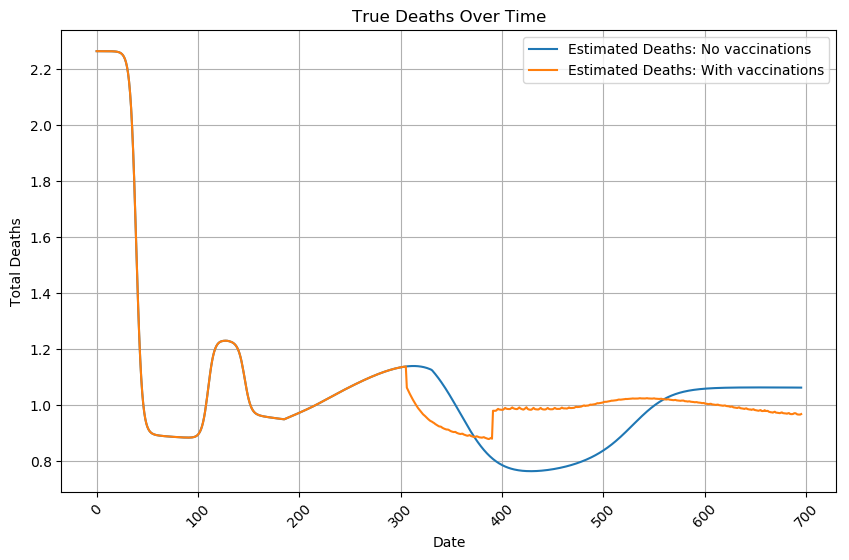

In [22]:
# see how effective_r changes with time 

## plot the true deaths 
import pandas as pd 
import matplotlib.pyplot as plt
# read simulated data  
df1 = pd.read_csv('results\\no_vaccinations.csv')
df2 = pd.read_csv('results\\with_vaccinations.csv')   
dates = df1.index
plt.figure(figsize=(10, 6)) 
plt.plot(dates, df1['mean_r_t'], label='Estimated Deaths: No vaccinations')
plt.plot(dates, df2['mean_r_t'], label='Estimated Deaths: With vaccinations')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('True Deaths Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\DELL\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotli

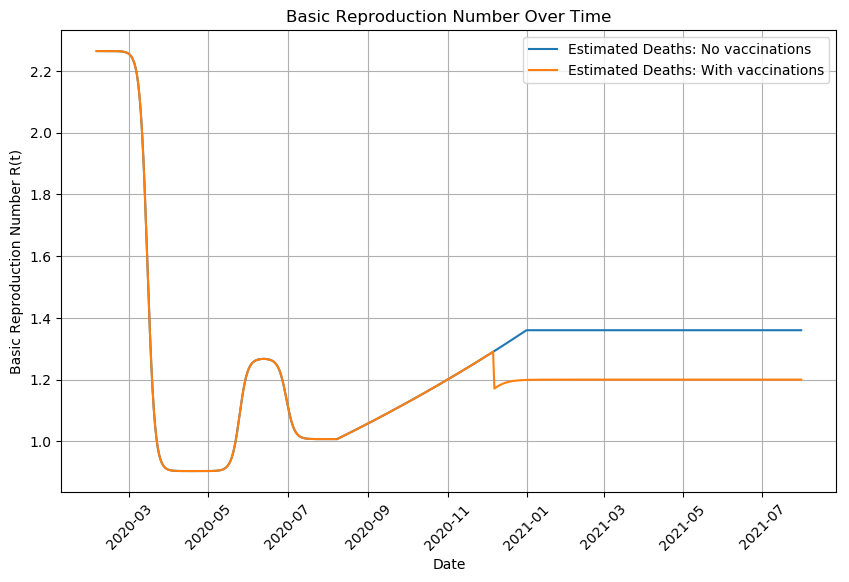

In [27]:
# see how R_0_ARR changes with time 

## plot the true deaths 
import pandas as pd 
import matplotlib.pyplot as plt 

# read simulated data  
df1 = pd.read_csv('results\\no_vaccinations.csv')
df2 = pd.read_csv('results\\with_vaccinations.csv')    
dates = pd.to_datetime(df1.iloc[:,0])
# dates = df1.index

plt.figure(figsize=(10, 6)) 
plt.plot(dates, df1['R_0_ARR'], label='Estimated Deaths: No vaccinations')
plt.plot(dates, df2['R_0_ARR'], label='Estimated Deaths: With vaccinations')
plt.xlabel('Date')
plt.ylabel('Basic Reproduction Number R(t)')
plt.title('Basic Reproduction Number Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True) 

# plt.show() 
plt.savefig("results//basic_reproduction_plot.png")

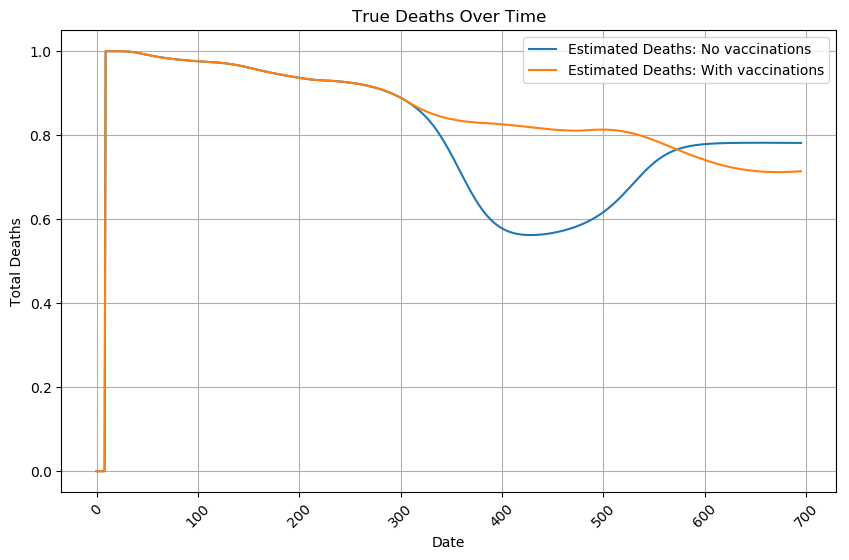

In [123]:
# see how r_immunity_perc_arr changes with time 

## plot the true deaths 
import pandas as pd 
import matplotlib.pyplot as plt 

# read simulated data  
df1 = pd.read_csv('results\\no_vaccinations.csv')
df2 = pd.read_csv('results\\with_vaccinations.csv')    
dates = df1.index

plt.figure(figsize=(10, 6)) 
plt.plot(dates, df1['r_immunity_perc'], label='Estimated Deaths: No vaccinations')
plt.plot(dates, df2['r_immunity_perc'], label='Estimated Deaths: With vaccinations')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('True Deaths Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
plt.show()

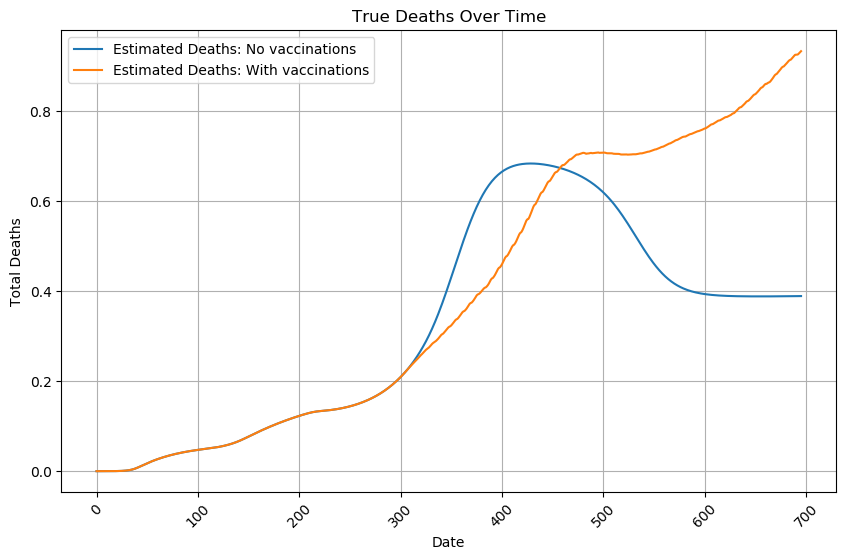

In [131]:
# see how total_immune_proportion changes with time 

## plot the true deaths 
import pandas as pd 
import matplotlib.pyplot as plt 

# read simulated data   
df1 = pd.read_csv('results\\no_vaccinations.csv')
df2 = pd.read_csv('results\\with_vaccinations.csv')    
dates = df1.index

plt.figure(figsize=(10, 6)) 
plt.plot(dates, df1['total_immune_proportion'], label='Estimated Deaths: No vaccinations')
plt.plot(dates, df2['total_immune_proportion'], label='Estimated Deaths: With vaccinations')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('True Deaths Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
plt.show()

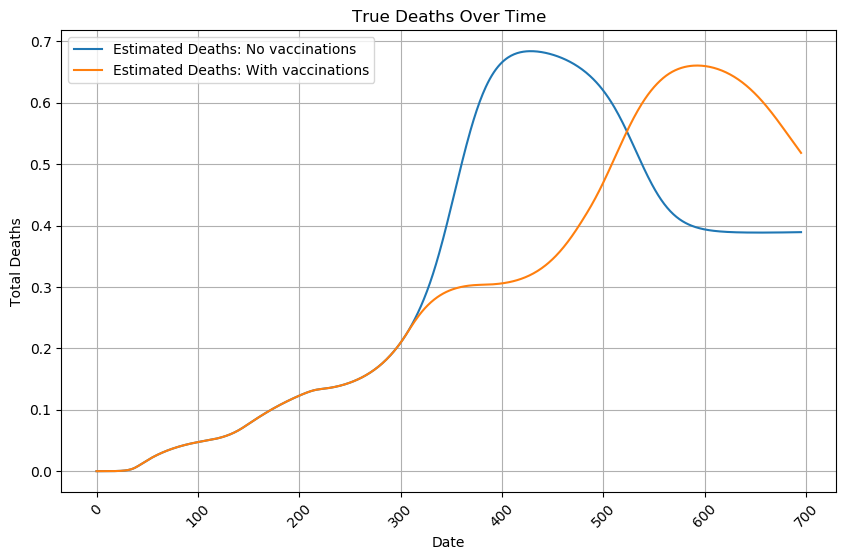

In [178]:
# see how perc_population_infected_thus_far changes with time 

## plot the true deaths 
import pandas as pd 
import matplotlib.pyplot as plt 

# read simulated data   
df1 = pd.read_csv('results\\no_vaccinations.csv')
df2 = pd.read_csv('results\\with_vaccinations.csv')    
dates = df1.index

plt.figure(figsize=(10, 6)) 
plt.plot(dates, df1['perc_population_infected_thus_far'], label='Estimated Deaths: No vaccinations')
plt.plot(dates, df2['perc_population_infected_thus_far'], label='Estimated Deaths: With vaccinations')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('True Deaths Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
plt.show()

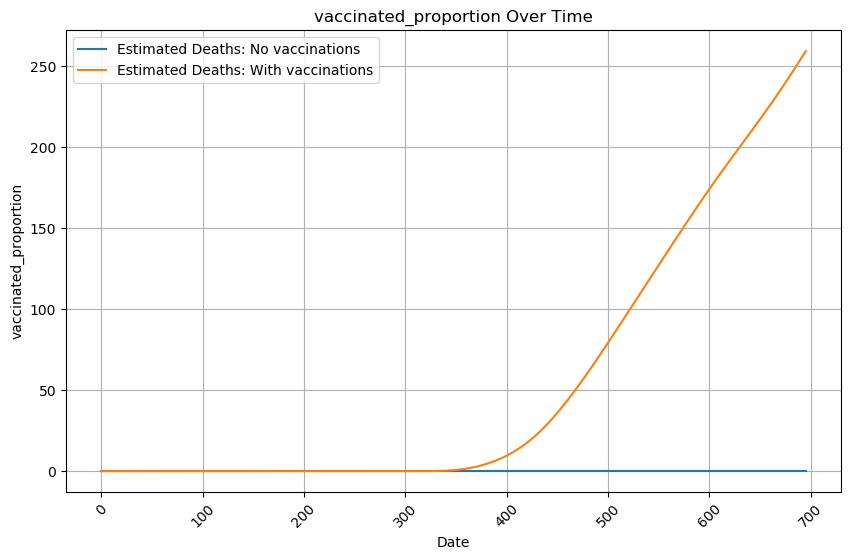

In [184]:
# see how vaccinated_proportion changes with time 

## plot the true deaths 
import pandas as pd 
import matplotlib.pyplot as plt 

# read simulated data   
key = "vaccinated_proportion"
df1 = pd.read_csv('results\\no_vaccinations.csv')
df2 = pd.read_csv('results\\with_vaccinations.csv')    
dates = df1.index

plt.figure(figsize=(10, 6)) 
plt.plot(dates, df1[key], label='Estimated Deaths: No vaccinations')
plt.plot(dates, df2[key], label='Estimated Deaths: With vaccinations')
plt.xlabel('Date')
plt.ylabel(key)
plt.title(key + ' Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
plt.show()

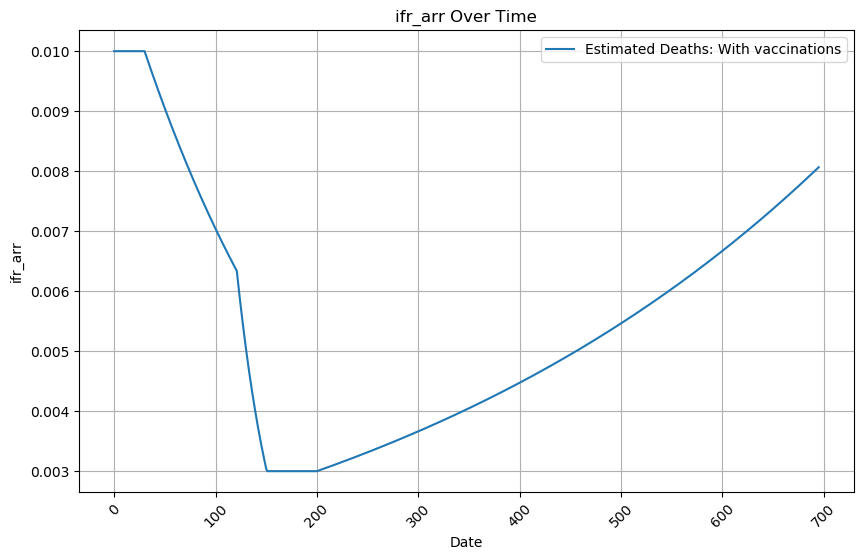

In [3]:
# see how ifr_arr changes with time 

## plot the true deaths 
import pandas as pd 
import matplotlib.pyplot as plt 

# read simulated data   
key = "ifr_arr"
df1 = pd.read_csv('results\\no_vaccinations.csv')
df2 = pd.read_csv('results\\with_vaccinations.csv')    
dates = df1.index

plt.figure(figsize=(10, 6)) 
# plt.plot(dates, df1[key], label='Estimated Deaths: No vaccinations')
plt.plot(dates, df2[key], label='Estimated Deaths: With vaccinations')
plt.xlabel('Date')
plt.ylabel(key)
plt.title(key + ' Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
plt.show()

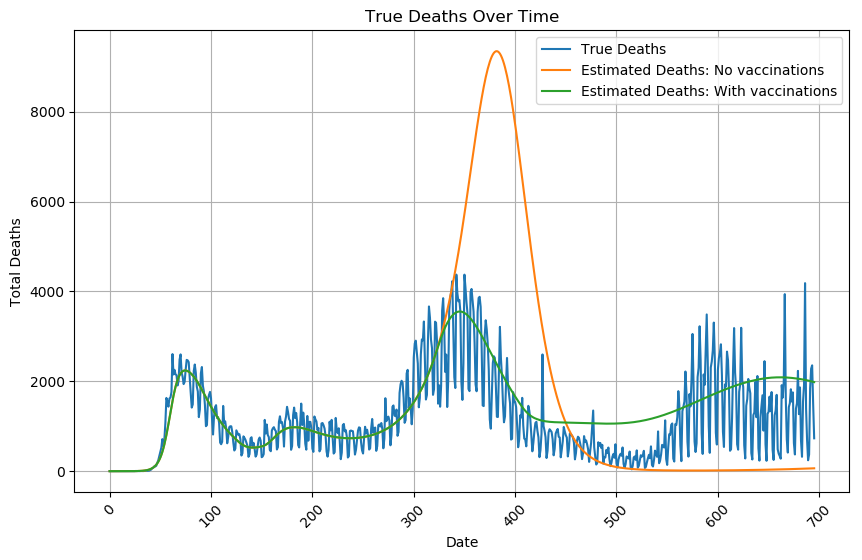

In [19]:
## plot the true deaths 
import pandas as pd 
import matplotlib.pyplot as plt

# read true daily deaths
true_deaths = get_true_daily_deaths() 
# read simulated data  
df1 = pd.read_csv('results\\no_vaccinations.csv')
df2 = pd.read_csv('results\\with_vaccinations.csv')   
dates = df1.index 
# Step 6: Plot the aggregated death data
plt.figure(figsize=(10, 6))
plt.plot(dates, true_deaths[1:], label='True Deaths')
plt.plot(dates, df1['deaths'], label='Estimated Deaths: No vaccinations')
plt.plot(dates, df2['deaths'], label='Estimated Deaths: With vaccinations')
plt.xlabel('Date')

plt.ylabel('Total Deaths')
plt.title('True Deaths Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
plt.show()

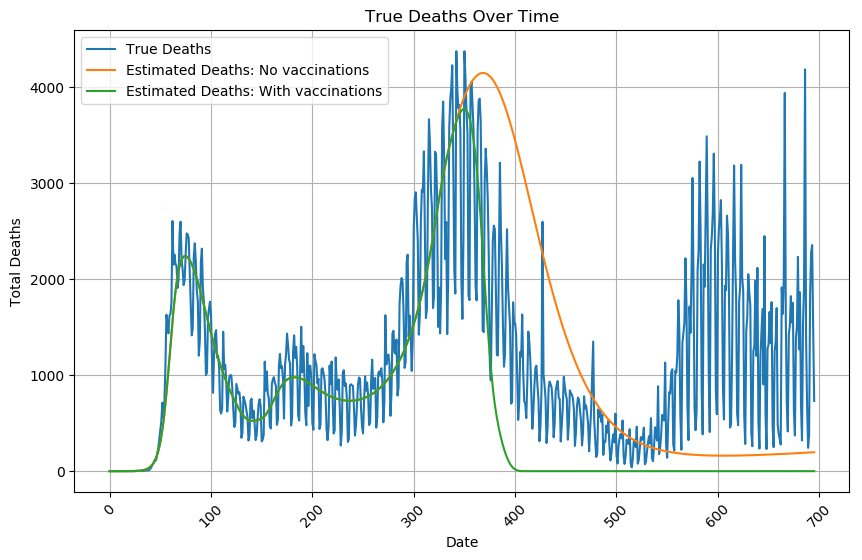

1028.8870819946287
961.7101756858173


In [4]:
## plot the true deaths 
import pandas as pd 
import matplotlib.pyplot as plt

# read true daily deaths
true_deaths = get_true_daily_deaths() 
# read simulated data  
df1 = pd.read_csv('results\\no_vaccinations.csv')
df2 = pd.read_csv('results\\with_vaccinations.csv')   
dates = df1.index 
# Step 6: Plot the aggregated death data
plt.figure(figsize=(10, 6))
plt.plot(dates, true_deaths[1:], label='True Deaths')
plt.plot(dates, df1['deaths'], label='Estimated Deaths: No vaccinations')
plt.plot(dates, df2['deaths'], label='Estimated Deaths: With vaccinations')
plt.xlabel('Date')

plt.ylabel('Total Deaths')
plt.title('True Deaths Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
plt.show()

# print loss
print(custom_loss(true_deaths[1:], df1['deaths']))
print(custom_loss(true_deaths[1:], df2['deaths']))

In [29]:
print(df1.iloc[250,0])
print(df1.iloc[500,0])

2020-10-12
2021-06-19
